In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
df = pd.read_csv('clean_lamudi_tangsel.csv')

In [3]:
df = df.drop(['lokasi','title'], axis=1)
x = df.drop('harga', axis=1)
y = df[['harga']]
xTrain, xValid, yTrain, yValid = train_test_split(x,y, test_size = 0.2)

In [ ]:
#RandomizedSearchCV Hyperparameters

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
#RSCV processing
regressor = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose= 2, random_state=12435, n_jobs = -1)

rf_random.fit(xTrain, yTrain)

In [ ]:
#Best parameter from RSCV
rf_random.best_params_
rf_random.best_score_

In [8]:
num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

random_search =RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [10]:
random_search.fit(xTrain, yTrain)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(loss='huber'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.05],
                                        'max_depth': [1, 2],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [500, 1000]},
                   random_state=1)

In [13]:
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 2,
 'learning_rate': 0.05}

In [4]:
regressor = GradientBoostingRegressor(loss = 'huber', n_estimators = 1000, learning_rate = 0.05, min_samples_split = 10, min_samples_leaf = 5, max_depth = 2, random_state = 42)

In [5]:
regressor.fit(xTrain, yTrain)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=2,
                          min_samples_leaf=5, min_samples_split=10,
                          n_estimators=1000, random_state=42)

In [6]:
regressor.score(xValid, yValid)

0.8443311829704846

In [21]:
random_search.score(xValid, yValid)

0.8244891922694493

<BarContainer object of 10 artists>

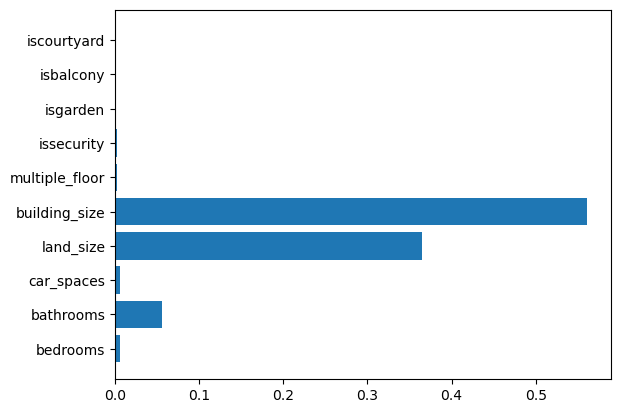

In [20]:
df_feature = df.drop('harga', axis = 1)
plt.barh(df_feature.columns.tolist(), regressor.feature_importances_)